In [1]:
import pandas as pd
import numpy as np
import pickle

from tqdm import tqdm

from models import Model4, Model5, Model6
from tools import Train, validation, GridSearch

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
with open('data/train_dataset.pickle', 'rb') as f:
    train_dataset = pickle.load(f)

with open('data/val_dataset.pickle', 'rb') as f:
    val_dataset = pickle.load(f)

with open('data/test_dataset.pickle', 'rb') as f:
    test_dataset = pickle.load(f)

In [4]:
train_loader = DataLoader(train_dataset, batch_size = 16, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 64, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [5]:
criterion = nn.MSELoss()
eval_metrics = [
    r2_score,
    mean_absolute_error
]

# Model 4

In [6]:
basic_params = {
    'T': 60,
    'n': 40
}

param_grid = {
    'm': [32, 40],
    'skip_hidden_size': [32, 40],
    'skip': [8, 10]
}

grid_model4 = GridSearch(criterion, eval_metrics, device, temp_save_path='checkpoints/model_by_param/temp_model.pt', masked=False)
model_name = 'model4'
best_model4 = grid_model4.train_by_grid(
        Model4, basic_params, param_grid,
        torch.optim.Adam, train_loader, val_loader,
        patience=3, epochs=20,
        save_filename=f'checkpoints/{model_name}_best.pt'
    )

Total   8 cases are going to be searched.
Setting   0 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [02:36<00:00, 16.65it/s, Train Loss=0.5839, Valid Loss=0.2646, Valid R2=0.4030, Valid MAE=0.4163]


Early Stopped
Setting   1 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [02:37<00:00, 16.52it/s, Train Loss=0.5769, Valid Loss=0.1978, Valid R2=0.5537, Valid MAE=0.3463]


Early Stopped
Setting   2 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [02:36<00:00, 16.67it/s, Train Loss=0.6014, Valid Loss=0.1982, Valid R2=0.5529, Valid MAE=0.3660]


Early Stopped
Setting   3 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [02:38<00:00, 16.50it/s, Train Loss=0.6169, Valid Loss=0.2379, Valid R2=0.4632, Valid MAE=0.3881]


Early Stopped
Setting   4 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [02:35<00:00, 16.74it/s, Train Loss=0.5769, Valid Loss=0.1760, Valid R2=0.6029, Valid MAE=0.3470]


Early Stopped
Setting   5 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [02:37<00:00, 16.52it/s, Train Loss=0.5852, Valid Loss=0.1857, Valid R2=0.5810, Valid MAE=0.3549]


Early Stopped
Setting   6 of Parameters Grid is now on progres.


Epoch 16: 100%|██████████| 2607/2607 [02:36<00:00, 16.70it/s, Train Loss=0.5705, Valid Loss=0.1953, Valid R2=0.5594, Valid MAE=0.3443]


Early Stopped
Setting   7 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [02:36<00:00, 16.64it/s, Train Loss=0.6025, Valid Loss=0.2024, Valid R2=0.5432, Valid MAE=0.3625]

Early Stopped


Test Loss: 0.1429 | Test R2: 0.9224 | Test MAE: 0.3056
Saving Process Complete. Directory: model4_losses.png


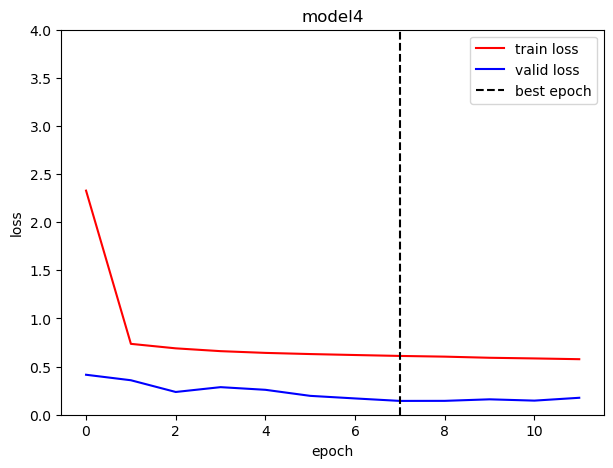

In [7]:
grid_model4.test(test_loader)
grid_model4.plot_losses(plot_title=f'{model_name}', save_filename=f'{model_name}_losses.png')

In [8]:
best_model4.m, best_model4.skip_hidden_size, best_model4.skip

(40, 32, 8)